In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
pf = pd.read_csv('data/FEdata.csv')
pf.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,2,1,1,4,1,77,1,1,...,3,80,1,7,2,4,7,5,0,7
1,54,0,1,1,1,4,1,1245,4,0,...,1,80,1,33,2,1,5,4,1,4
2,34,1,1,1,7,3,1,147,1,1,...,4,80,0,9,3,3,9,7,0,6
3,39,0,2,1,1,1,1,1026,4,0,...,3,80,1,21,3,3,21,6,11,8
4,28,1,1,1,1,3,3,1111,1,1,...,1,80,2,1,2,3,1,0,0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


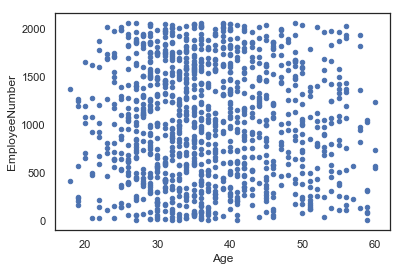

In [5]:
pf.plot(kind="scatter", x="Age", y="EmployeeNumber")

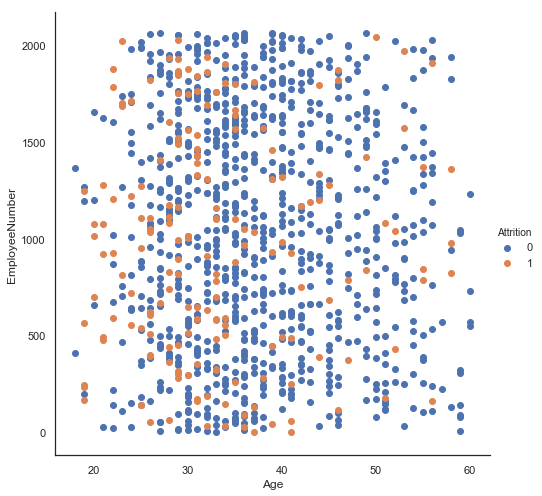

In [11]:
sns.FacetGrid(pf, hue="Attrition", height=7).map(plt.scatter, "Age", "EmployeeNumber").add_legend()

0为未离职，1为离职
与年龄有很大关系，年轻员工有着较高的离职率

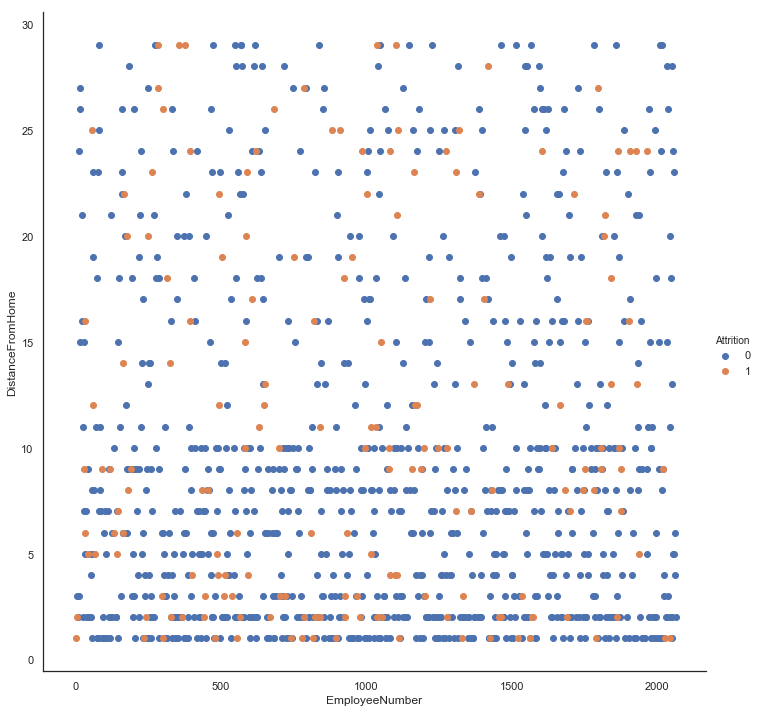

In [19]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "DistanceFromHome").add_legend()

超过10km路程的，人数降低，离职率提高

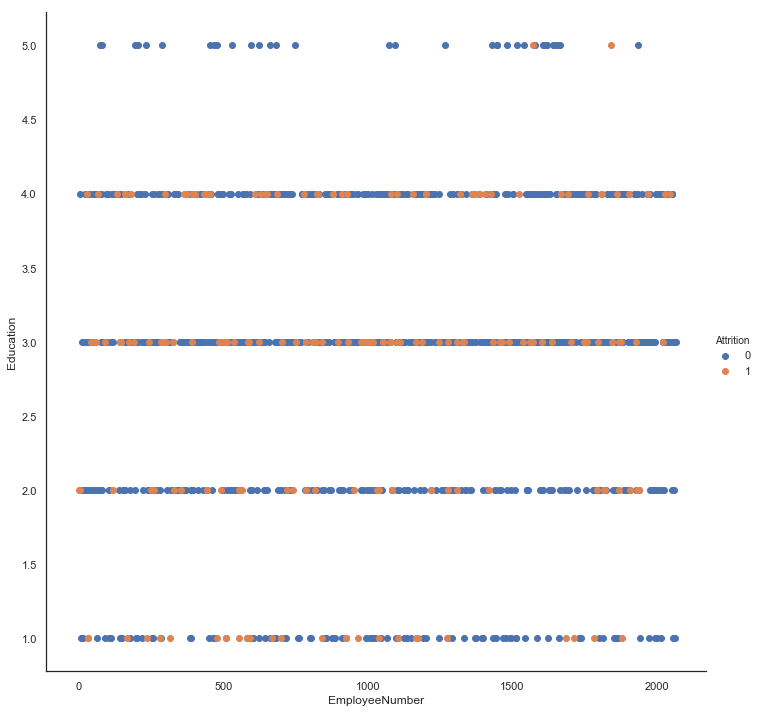

In [18]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "Education").add_legend()

中等教育层次有着较高的离职率，最高教育层次，离职率最低

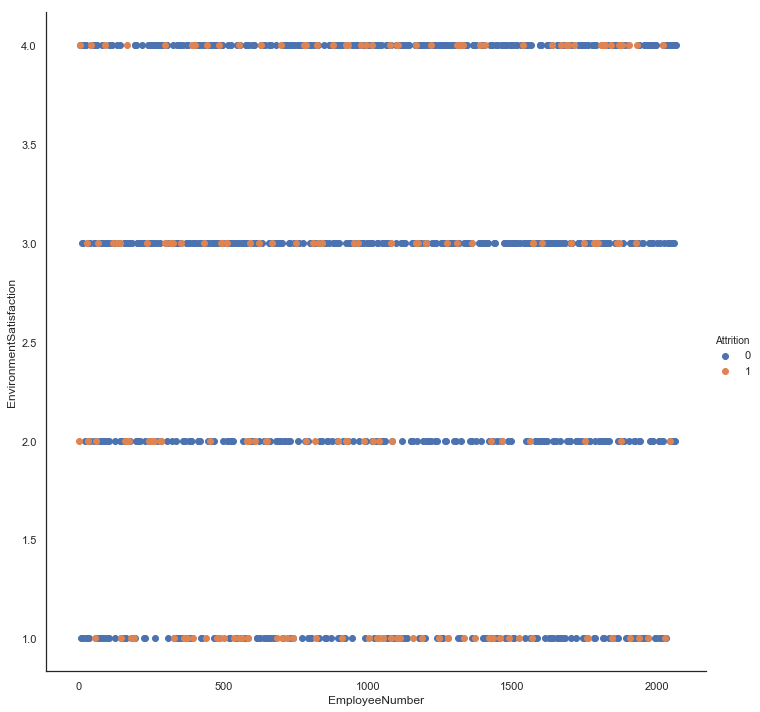

In [21]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "EnvironmentSatisfaction").add_legend()

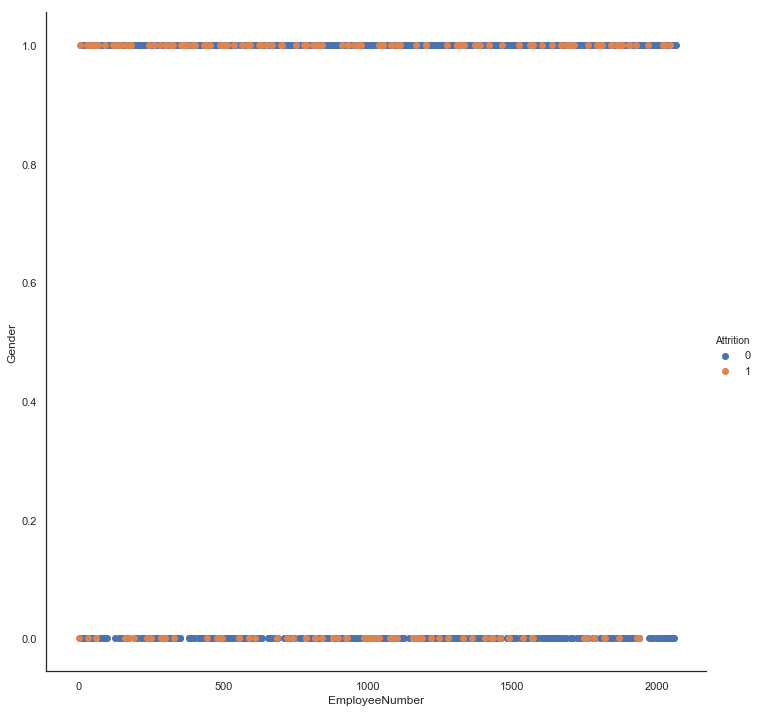

In [22]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "Gender").add_legend()

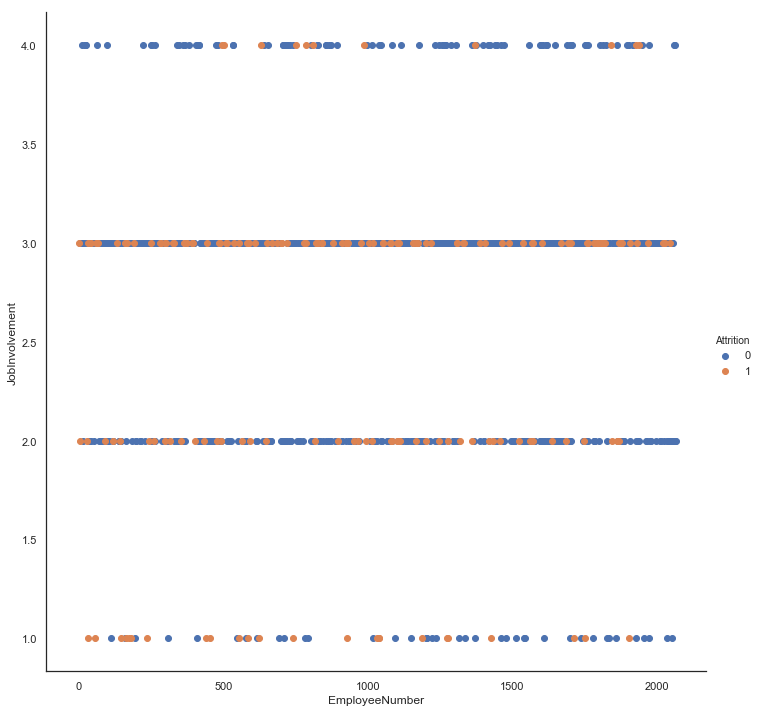

In [23]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "JobInvolvement").add_legend()

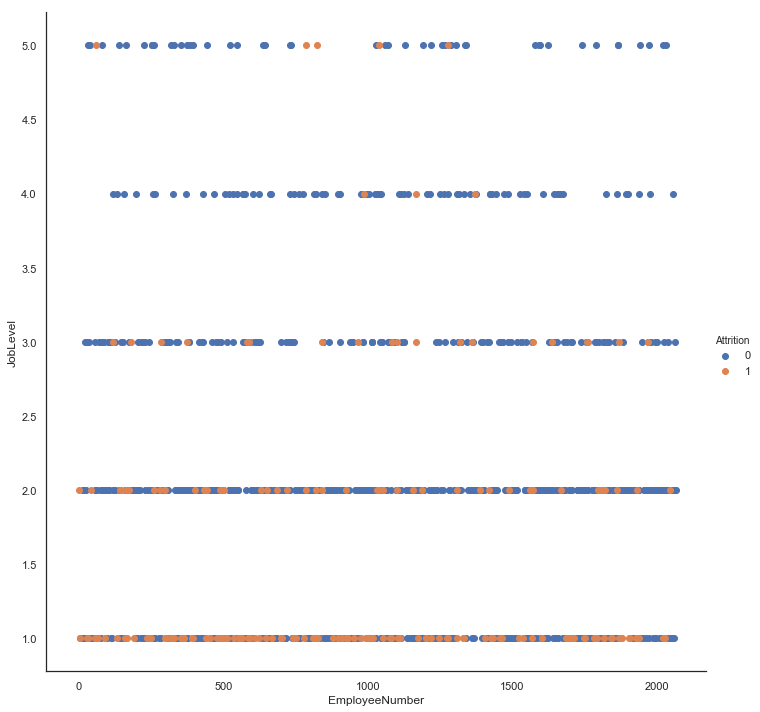

In [24]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "JobLevel").add_legend()

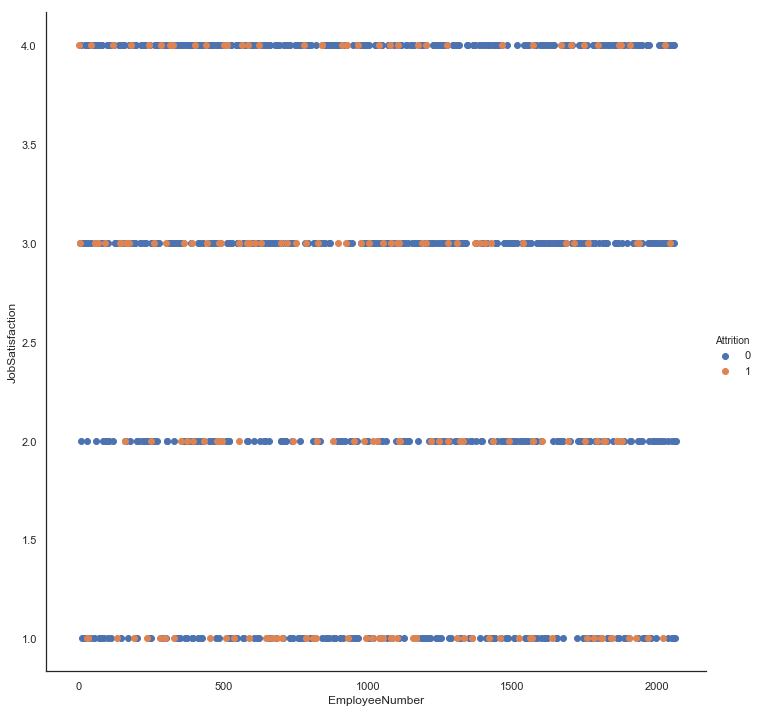

In [25]:
sns.FacetGrid(pf, hue="Attrition", height=10).map(plt.scatter, "EmployeeNumber", "JobSatisfaction").add_legend()

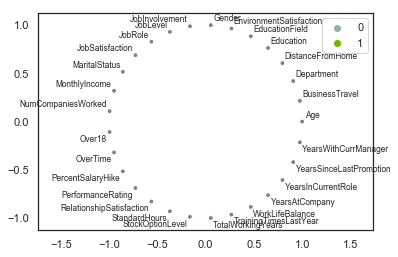

In [17]:
from pandas.tools.plotting import radviz
radviz(pf.drop("EmployeeNumber", axis=1), "Attrition")

In [18]:
corrDf = pf.corr()
corrDf['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.267080
DistanceFromHome            0.088563
JobRole                     0.086899
EducationField              0.055239
Department                  0.053364
PerformanceRating           0.046762
PercentSalaryHike           0.026604
NumCompaniesWorked          0.025889
Gender                      0.016750
BusinessTravel              0.015483
TrainingTimesLastYear      -0.043395
EmployeeNumber             -0.045168
Education                  -0.046494
WorkLifeBalance            -0.048794
RelationshipSatisfaction   -0.051749
YearsSinceLastPromotion    -0.071760
EnvironmentSatisfaction    -0.097003
JobInvolvement             -0.122722
JobSatisfaction            -0.125568
StockOptionLevel           -0.138498
YearsAtCompany             -0.143697
MaritalStatus              -0.153045
MonthlyIncome              -0.155521
YearsWithCurrManager       -0.158558
YearsInCurrentRole         -0.163059
JobLevel                   -0.168775
A

In [19]:
print(corrDf)

                               Age  Attrition  BusinessTravel  Department  \
Age                       1.000000  -0.175393        0.024270   -0.017185   
Attrition                -0.175393   1.000000        0.015483    0.053364   
BusinessTravel            0.024270   0.015483        1.000000   -0.040937   
Department               -0.017185   0.053364       -0.040937    1.000000   
DistanceFromHome          0.007081   0.088563       -0.040339    0.013349   
Education                 0.198558  -0.046494       -0.041300   -0.006280   
EducationField            0.021992   0.055239        0.019833   -0.074275   
EmployeeNumber           -0.010953  -0.045168       -0.000161   -0.006813   
EnvironmentSatisfaction   0.011803  -0.097003       -0.013328   -0.021766   
Gender                   -0.029794   0.016750       -0.033992   -0.034053   
JobInvolvement            0.066528  -0.122722        0.019014   -0.040219   
JobLevel                  0.513882  -0.168775        0.022423    0.107801   

In [6]:
pf.groupby('Attrition').count()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,922,922,922,922,922,922,922,922,922,922,...,922,922,922,922,922,922,922,922,922,922
1,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178


In [7]:
922/178


5.179775280898877

In [8]:
178/922

0.19305856832971802